# Module

In [55]:
# Module สำหรับจัดการข้อมูลให้อยู่ในรูปแบบ DF
import pandas as pd
# Module สำหรับวาดกราฟ
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
# Module สำหรับช่วยในการคำนวณ
import numpy as np
# Module สำหรับช่วยคำนวณสถิติทดสอบ
from scipy.stats import ttest_ind, shapiro

# Import Dataset
Dataset from kaggle

In [56]:
# Download Data Free Opensource จาก Kaggle
import kagglehub
path = kagglehub.dataset_download("amirmotefaker/ab-testing-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\kitak\.cache\kagglehub\datasets\amirmotefaker\ab-testing-dataset\versions\1


In [57]:
df = pd.read_csv(r"C:\Users\kitak\.cache\kagglehub\datasets\amirmotefaker\ab-testing-dataset\versions\1\control_group.csv",encoding="latin1", sep=';')
dftest = pd.read_csv(r"C:\Users\kitak\.cache\kagglehub\datasets\amirmotefaker\ab-testing-dataset\versions\1\test_group.csv",encoding="latin1", sep=';')

# EDA & Preparing Data
สำรวจข้อมูล เปรียบเทียบค่าต่างๆด้วย Barchart ทดสอบหาความปกติของข้อมูล
รายละเอียดข้อมูลที่ได้รับมามี 10 Factors ดังนี้ 

1.Campaign Name : ชื่อ Campaign ที่จะเอามาเปรียบเทียบกัน

2.Date : วันที่ของ Transaction นั้น

3.Spend [USD] : จำนวนเงินที่ Customers จ่ายเข้ามาในวันนั้นๆ

4.# of impresstion : จำนวนครั้งที่มีการแสดงโฆษณาในแต่ละวัน

5.Reach : จำนวนการเข้าถึงของแต่ละ Users ( 1 User = 1 Reach) ในแต่ละวัน

6.# of Website Clicks : จำนวนครั้งที่มีการกดเข้า Website ในแต่ละวัน

7.# of Searches : จำนวนครั้งที่มีการค้นหา Website ในแต่ละวัน

8.# of View Content : จำนวนการดู Content ในแต่ละวัน

9.# of Add to Cart : จำนวนการเลือกหยิบสินค้าในแต่ละวัน

10.# of Purchase : จำนวนการซื้อสินค้า(Quantity)ในแต่ละวัน


In [59]:
# ตรวจสอบขนาดของ DF
df.shape

(30, 10)

In [ ]:
# ตัดข้อมูลที่ขาดไปใน Control Campaign ออก
df = df.dropna()
df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
10,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


In [ ]:
# ตัดข้อมูลที่ขาดไปใน Test Campaign ออก
dftest = dftest.dropna()
dftest

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [ ]:
# จับข้อมูลมาทั้งสองมา Append หรือ Union กัน เพื่อนำไปใช้วิเคราะห์ต่อ
# ***หมายเหตุ ไม่จำเป็นต้องนำมารวมกัน ใช้แยกกันตามความถนัดได้ครับ
dfuni = pd.concat([df,dftest],ignore_index=True)
dfuni

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [79]:
dfuni.dtypes

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

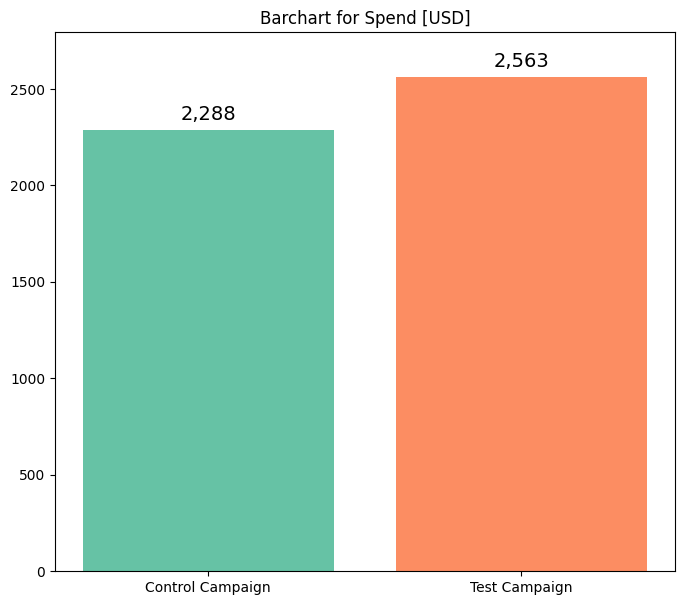

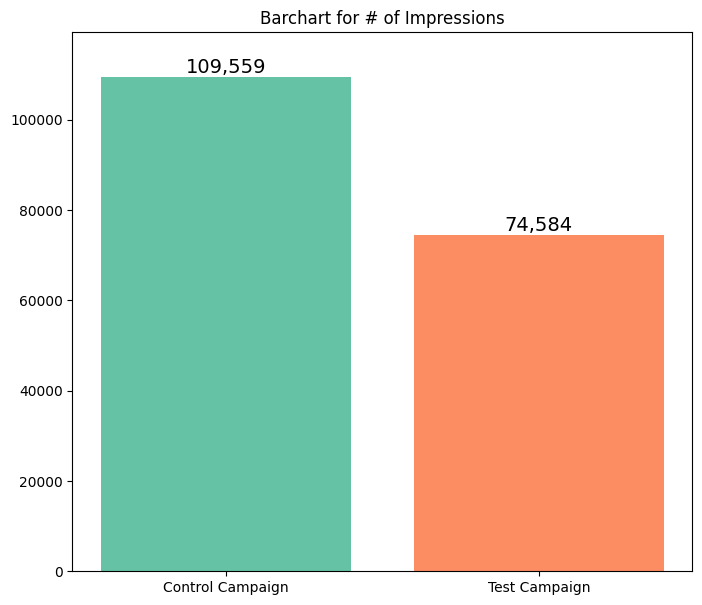

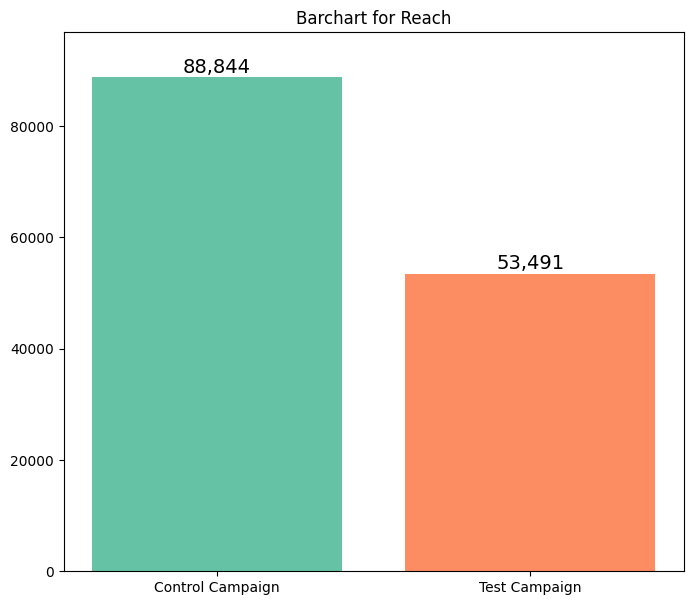

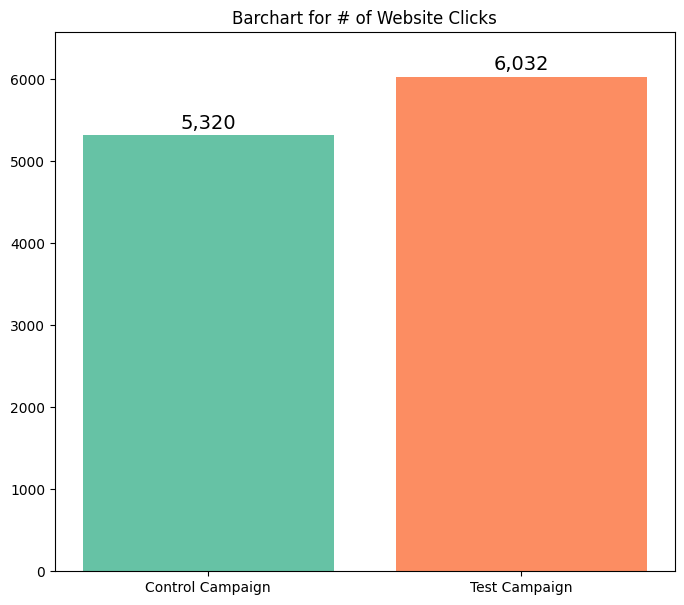

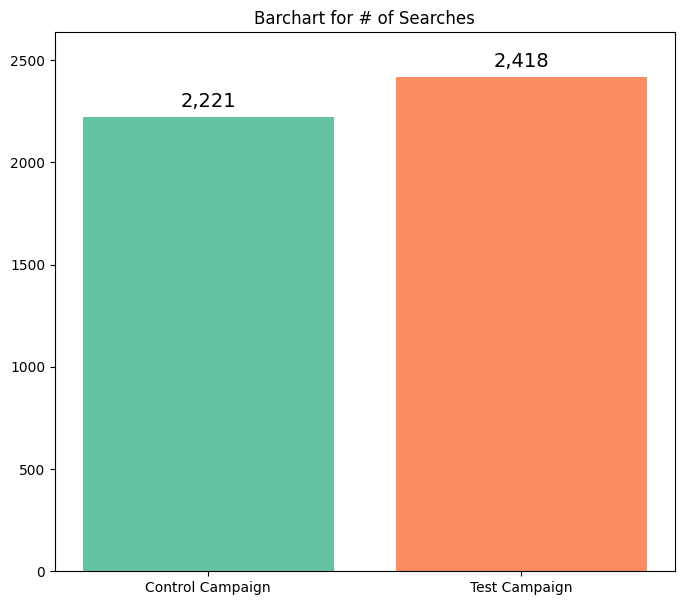

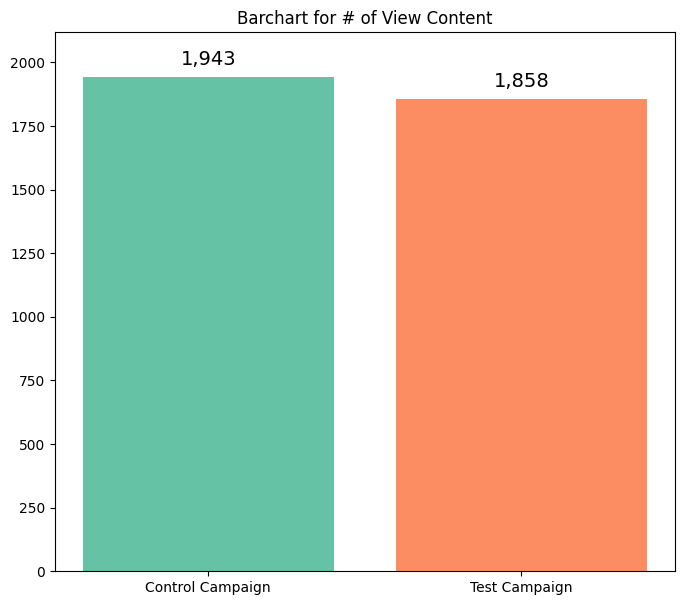

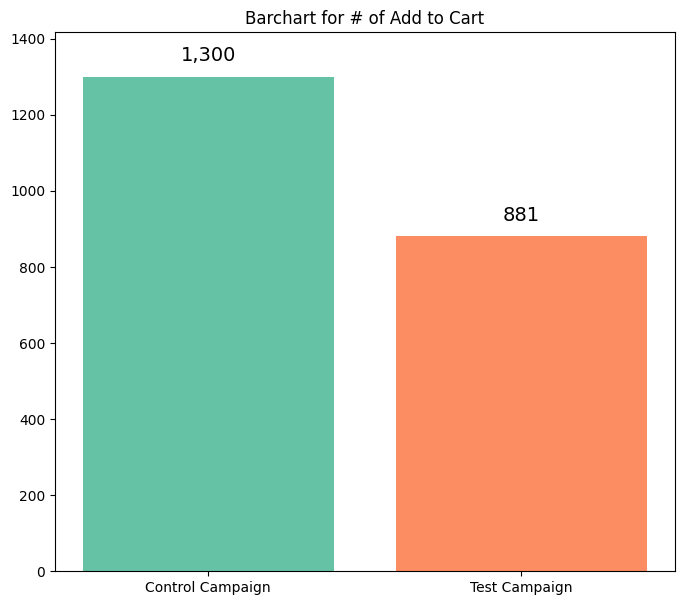

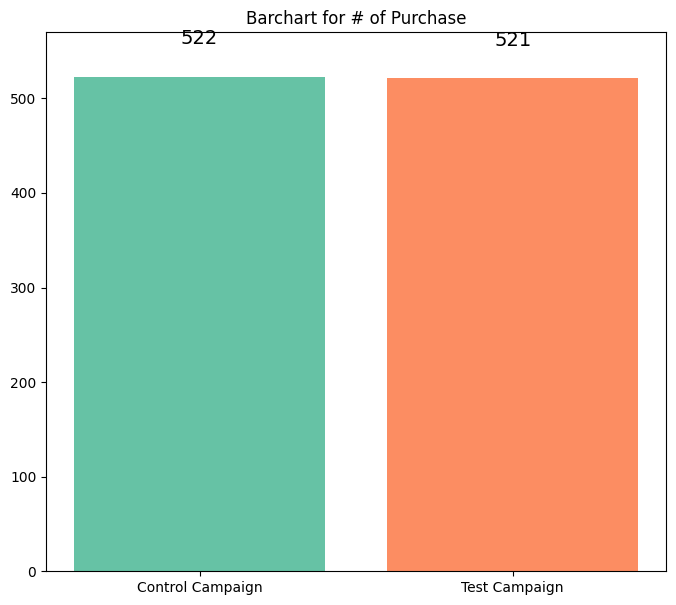

In [100]:
# สร้างฟังก์ชันสำหรับ Data lebel ไปใส่บนกราฟ
def add_labels(x, y,fontsize):
    for i in range(len(x)):
        plt.text(i, y[i]+30, f"{int(y[i]):,}", ha='center', va='bottom', fontsize=fontsize)  

palette = sns.color_palette("Set2")
# สร้าง Loop สำหรับสร้างกราฟตรวจสอบข้อมูลดูทีละค่า โดยจะเทียบค่าเฉลี่ย ระหว่างข้อมูลที่เป็น Control และ Test campaign
for a in ['Spend [USD]','# of Impressions','Reach','# of Website Clicks','# of Searches','# of View Content','# of Add to Cart', '# of Purchase'] :
    dd = dfuni.groupby('Campaign Name')[a].mean()
    colors = palette[:len(dd)]
    plt.figure(figsize=(8,7))
    dd = dd.reset_index()
    plt.ylim(0,np.max(dd[a])*1.09)
    plt.title(f'Barchart for {a}')
    plt.bar(dd['Campaign Name'],dd[a],color=colors)
    add_labels(dd['Campaign Name'],dd[a], fontsize=14)

In [28]:
for i in dfuni.select_dtypes(include=['int64', 'float64']).columns:
    stat, p = shapiro(dfuni[i])
    print('Statistic = %.3f, p = %.3f' % (stat, p))
    if p > 0.05:
        print(f"{i} is normally distributed")
    else:
        print(f"{i} is NOT normal")
    print('-'*700)

Statistic = 0.962, p = 0.066
Spend [USD] is normally distributed
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Statistic = 0.953, p = 0.023
# of Impressions is NOT normal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# A/B Testing
หลังจากที่ EDA พิจารณาข้อมูลด้วยกราฟแล้วก็จะพบว่ามีบางค่าที่ดูใกล้เคียงกันมาก เช่น # of View Content และ # of Purchase ส่วนค่าอื่นๆต่างกันอย่างเห็นได้ชัด

และเพื่อความมั่นใจในการตัดสินใจ เราจะลองตรวจสอบความแตกต่างของ 2 Campaign นี้ ด้วย A/B testing ครับ

In [29]:
CH0 = 0
CH1 = 0
for i in [  'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'] :
    A = dfuni[dfuni['Campaign Name'] == 'Control Campaign'][i]
    B = dfuni[dfuni['Campaign Name'] == 'Test Campaign'][i]

    # A/B t-test
    t_stat, p_val = ttest_ind(A, B, equal_var=False)

    # สร้างตัวแปรเปรียบเทียบค่าเฉลี่ยอีกรอบ
    Amean = np.mean(A)
    Bmean = np.mean(B)

    # print ผลลัพธ์ที่ต้องการ
    print(f'สมมติฐานสำหรับ ตัวแปร *{i}* พบว่า')
    print(f"Control mean : {Amean}")
    print(f"Test mean : {Bmean}")
    print("T-statistic:", t_stat)
    print("P-value:", p_val)

    # สรุปผล
    alpha = 0.05
    if p_val < alpha:
        print("Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ")
        CH1 = CH1+1
    else:
        print("Fail to Reject H0 → Campaign ไม่ได้ต่างกันอย่างมีนัยสำคัญ")
        CH0 = CH0+1
    print('-'*70)

print(CH0)
print(CH1)


สมมติฐานสำหรับ ตัวแปร *Spend [USD]* พบว่า
Control mean : 2304.0689655172414
Test mean : 2563.0666666666666
T-statistic: -2.791233468499734
P-value: 0.007143453329959865
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *# of Impressions* พบว่า
Control mean : 109559.75862068965
Test mean : 74584.8
T-statistic: 4.916124133015366
P-value: 9.549344891722425e-06
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *Reach* พบว่า
Control mean : 88844.93103448275
Test mean : 53491.566666666666
T-statistic: 5.325114270075589
P-value: 2.0077300697963643e-06
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *# of Website Clicks* พบว่า
Control mean : 5320.793103448276
Test mean : 6032.333333333333
T-statistic: -1.5761

หลังจาก A/B testing เราจะเห็นได้ว่านอกจาก # of View content และ # of Purcahse แล้ว ยังมี # of Websire Clicks กับ # of Searchs ด้วยที่ไม่มีความแตกต่างกันอย่างมีนัยยะสำคัญ ส่วนตัวแปรอื่นๆแตกต่างกันอย่างมีนัยยะสำคัญทั้งหมดครับ

ซึ่งจากข้อสรุปจากการสมมติฐาน และการใช้สถิติทดสอบได้คำตอบแตกต่างกัน จะช่วยให้เราสามารถพิจารณาการตัดสินใจได้มากขึ้นครับ